# Titanic Project

In this project, we are going to predict who is going to survive, based on the Titanic dataset

## Data Dictionary


survival:	Survival;	0 = No, 1 = Yes

pclass:	Ticket class;	1 = 1st, 2 = 2nd, 3 = 3rd

sex:	Sex	

Age:	Age in years

sibsp:	# of siblings / spouses aboard the Titanic

parch:	# of parents / children aboard the Titanic

ticket:	Ticket number

fare:	Passenger fare

cabin:	Cabin number	

embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

<img
src='https://miro.medium.com/v2/resize:fit:1400/1*iOCbIdKMy2I2sUsNBMES5Q.jpeg' > 

<a href = 'https://www.kaggle.com/c/titanic/data' target=_blank> Check out the link to explore the datasets </a>

### Imports libraries we will need

In [1]:
import pandas as pd
pd.set_option("display.max_columns",55)

import seaborn as sns
import matplotlib.pyplot as plt


import numpy as np
import datetime

import warnings 
warnings.filterwarnings('ignore')

### Import data

In [2]:
df_train=pd.read_csv('ttrain.csv') 

In [3]:
df_test=pd.read_csv('ttest.csv')

### EDA- Exploratory Data Analysis

In [4]:
# First, we are going to explore ttrain data

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df_train.shape

(891, 12)

In [10]:
df_train.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


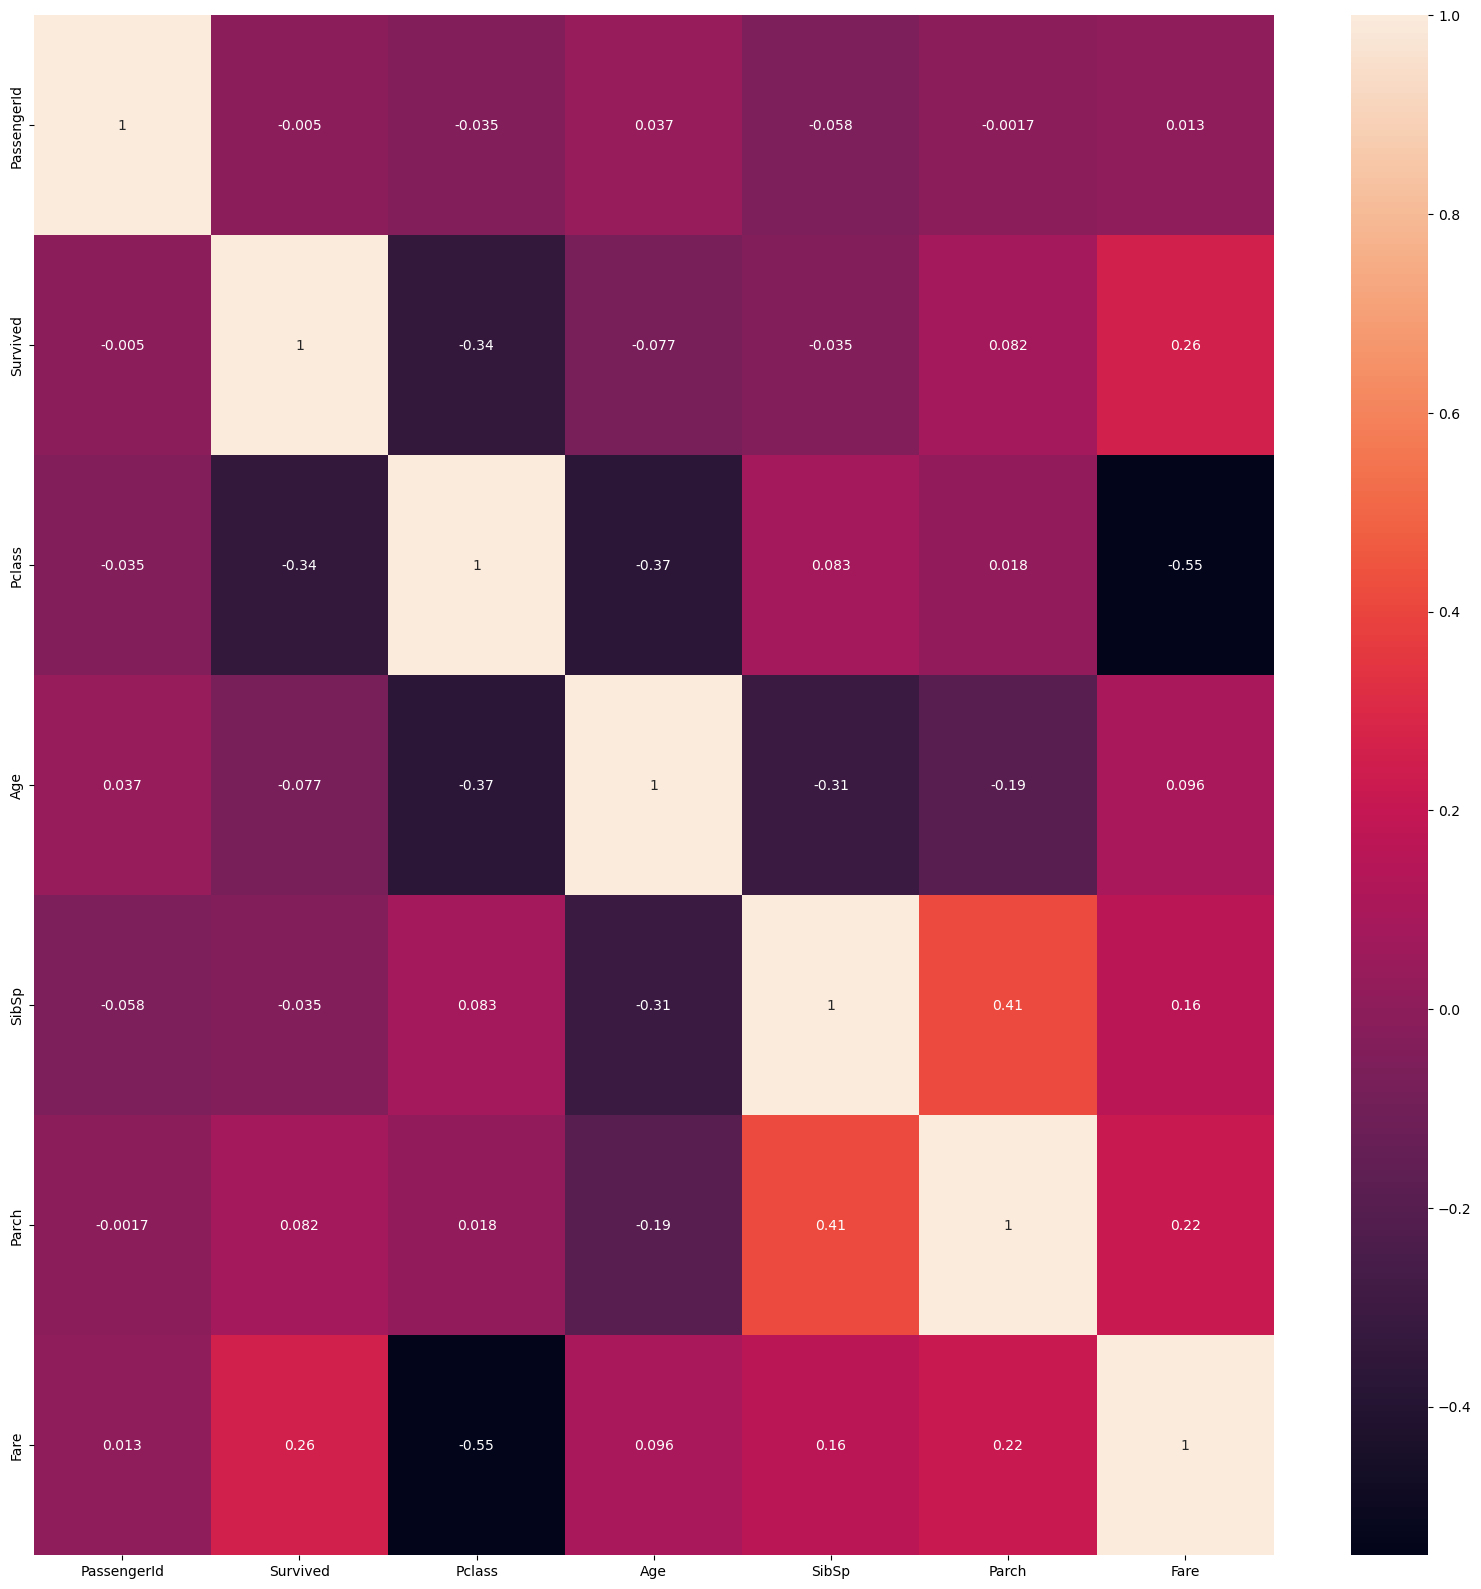

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(df_train.corr(numeric_only=True), annot=True);

In [12]:
abs(df_train.corr(numeric_only=True)['Survived']).sort_values(ascending=False)

Survived       1.000000
Pclass         0.338481
Fare           0.257307
Parch          0.081629
Age            0.077221
SibSp          0.035322
PassengerId    0.005007
Name: Survived, dtype: float64

In [13]:
# We are going to concat rest data and train data

In [14]:
df=pd.concat([df_train,df_test]) 

In [15]:
df.shape

(1309, 12)

In [16]:
# Firstly, we are going to fill in the empty data

In [17]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [18]:
df['Fare'].mean(),df['Fare'].max(),df['Fare'].min(),df['Fare'].std()

(33.29547928134557, 512.3292, 0.0, 51.75866823917414)

In [19]:
df['Fare'].value_counts()

Fare
8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
7.7417      1
8.1583      1
8.4583      1
7.8000      1
7.7208      1
Name: count, Length: 281, dtype: int64

In [20]:
df['Fare'].fillna(df['Fare'].mean(),inplace=True) # we have been filled the empty rows in Fare column with the mean value.

In [21]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
dtype: int64

<Axes: xlabel='count', ylabel='Embarked'>

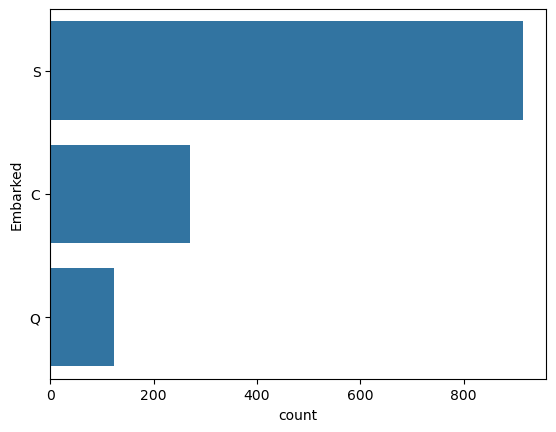

In [23]:
sns.countplot(df['Embarked']) # How we fill Embarked column?

In [24]:
df['Embarked']=df['Embarked'].fillna('S') #Since they are more likely to board from station S, we will fill it as S.

In [25]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [26]:
df['Cabin'].value_counts()

Cabin
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
                  ..
A14                1
E63                1
E12                1
E38                1
C105               1
Name: count, Length: 186, dtype: int64

In [27]:
del df['Cabin'] # The cabin column has been deleted as more than 75% is empty.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 122.7+ KB


In [30]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


There are blank data in the age column. We know that survival is directly related to age. We can fill the age column by commenting through the titles in the Name column.

In [31]:
df['Title']=df['Name'].str.extract(' ([A-Za-z]+)\.',expand=True)

In [32]:
df['Title'].value_counts()

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

In [33]:
df['Title']=df['Title'].replace(['Ms','Mlle'],'Miss')

In [34]:
df['Title']=df['Title'].replace(['Mme','Countess','Lady','Dona'],'Mrs')

In [35]:
df['Title']=df['Title'].replace(['Dr','Major','Col','Sir','Rev','Jonkheer','Capt','Don'],'Mr')

In [36]:
df['Title'].value_counts()

Title
Mr        783
Miss      264
Mrs       201
Master     61
Name: count, dtype: int64

In [37]:
df=df.drop('Name',axis=1) # We don't need the Name column anymore

In [38]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Title'],
      dtype='object')

In [39]:
df['Age']=df['Age'].fillna(df.groupby('Title')['Age'].transform('median')) #We grouped by title and filled in the empty ages according to the age median of each group

In [40]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
dtype: int64

In [41]:
del df['PassengerId']
del df['Ticket']

In [42]:
df.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Title         0
dtype: int64

In [43]:
df=pd.get_dummies(df,drop_first=True) #we converted string data to numeric data

In [44]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,22.0,1,0,7.2500,True,False,True,False,True,False
1,1.0,1,38.0,1,0,71.2833,False,False,False,False,False,True
2,1.0,3,26.0,0,0,7.9250,False,False,True,True,False,False
3,1.0,1,35.0,1,0,53.1000,False,False,True,False,False,True
4,0.0,3,35.0,0,0,8.0500,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,30.0,0,0,8.0500,True,False,True,False,True,False
414,NaN,1,39.0,0,0,108.9000,False,False,False,False,False,True
415,NaN,3,38.5,0,0,7.2500,True,False,True,False,True,False
416,NaN,3,30.0,0,0,8.0500,True,False,True,False,True,False


In [49]:
# Now we can separate our data into train and test again.

In [45]:
train=df[:891]
test=df[891:]

In [47]:
# We subtracted our target Survived column from Train data and set it equal to x. We set Survived data equal to y.

In [48]:
x=train.drop('Survived',axis=1) 
y=train['Survived']

In [65]:
#Let's import ML libraries

In [51]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [52]:
d=DecisionTreeClassifier() # First, we will apply DecisionTreeClassifier

In [53]:
model =d.fit(x,y)

In [54]:
test

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,NaN,3,34.5,0,0,7.8292,True,True,False,False,True,False
1,NaN,3,47.0,1,0,7.0000,False,False,True,False,False,True
2,NaN,2,62.0,0,0,9.6875,True,True,False,False,True,False
3,NaN,3,27.0,0,0,8.6625,True,False,True,False,True,False
4,NaN,3,22.0,1,1,12.2875,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,30.0,0,0,8.0500,True,False,True,False,True,False
414,NaN,1,39.0,0,0,108.9000,False,False,False,False,False,True
415,NaN,3,38.5,0,0,7.2500,True,False,True,False,True,False
416,NaN,3,30.0,0,0,8.0500,True,False,True,False,True,False


In [55]:
del test['Survived']

In [56]:
tahmin=model.predict(test)

In [57]:
tahmin

array([0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 0.

In [59]:
sonuc=df_test[['PassengerId']]

In [60]:
sonuc['Survived']=tahmin

In [61]:
sonuc

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,1.0
3,895,1.0
4,896,0.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [62]:
sonuc['Survived']=sonuc['Survived'].astype('int64')

In [63]:
sonuc.sample()

,PassengerId,Survived
57,949,0


In [64]:
sonuc.to_csv('titanictahmin1.csv',index=False)

In [66]:
r=RandomForestClassifier() # we will apply RandomForestClassifier

In [67]:
model =r.fit(x,y)

In [68]:
tahmin2=model.predict(test)

In [70]:
sonuc2=df_test[['PassengerId']]

In [71]:
sonuc2['Survived']=tahmin2

In [72]:
sonuc2['Survived']=sonuc2['Survived'].astype('int64')

In [73]:
sonuc2

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [74]:
sonuc2.to_csv('titanictahmin2.csv',index=False)

In [83]:
g=GaussianNB() # we will apply GaussianNB

In [76]:
model =g.fit(x,y)

In [77]:
tahmin3=model.predict(test)

In [78]:
sonuc3=df_test[['PassengerId']]

In [79]:
sonuc3['Survived']=tahmin3

In [80]:
sonuc3['Survived']=sonuc3['Survived'].astype('int64')

In [81]:
sonuc3

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [82]:
sonuc3.to_csv('titanictahmin3.csv',index=False)

In [84]:
b=BernoulliNB() # we will apply BernoulliNB

In [85]:
model =b.fit(x,y)

In [86]:
tahmin4=model.predict(test)

In [87]:
sonuc4=df_test[['PassengerId']]

In [88]:
sonuc4['Survived']=tahmin4

In [89]:
sonuc4['Survived']=sonuc4['Survived'].astype('int64')

In [90]:
sonuc4

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [91]:
sonuc3.to_csv('titanictahmin4.csv',index=False)